In [ ]:
# Load df_fe
import pandas as pd
df_fe = pd.read_pickle('/content/drive/MyDrive/Audio_Genre_ML/df_fe.pkl')

In [ ]:
df_fe.head()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,track_genre,popularity_log,duration_min,log_acousticness,log_duration,log_loudness,dance_valence,energy_dance,energy_speech,tempo_bin_encoded
0,73,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,...,acoustic,4.304065,3.844433,0.031692,12.348730,3.993677,0.483340,0.311636,0.065923,0
1,55,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,...,acoustic,4.025352,2.493500,0.654406,11.915794,3.778834,0.112140,0.069720,0.012666,0
2,57,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,...,acoustic,4.060443,3.513767,0.190620,12.258793,3.937028,0.052560,0.157242,0.019996,0
3,71,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,...,acoustic,4.276666,3.365550,0.644482,12.215696,3.749151,0.038038,0.015854,0.002163,3
4,82,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,...,acoustic,4.418841,3.314217,0.384582,12.200326,3.938061,0.103206,0.273774,0.023302,1


In [ ]:
df_fe.shape

(113999, 22)

In [ ]:
df_fe.columns

Index(['popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'time_signature', 'track_genre', 'popularity_log',
       'duration_min', 'log_acousticness', 'log_duration', 'log_loudness',
       'dance_valence', 'energy_dance', 'energy_speech', 'tempo_bin_encoded'],
      dtype='object')

## Plot Genre Distribution

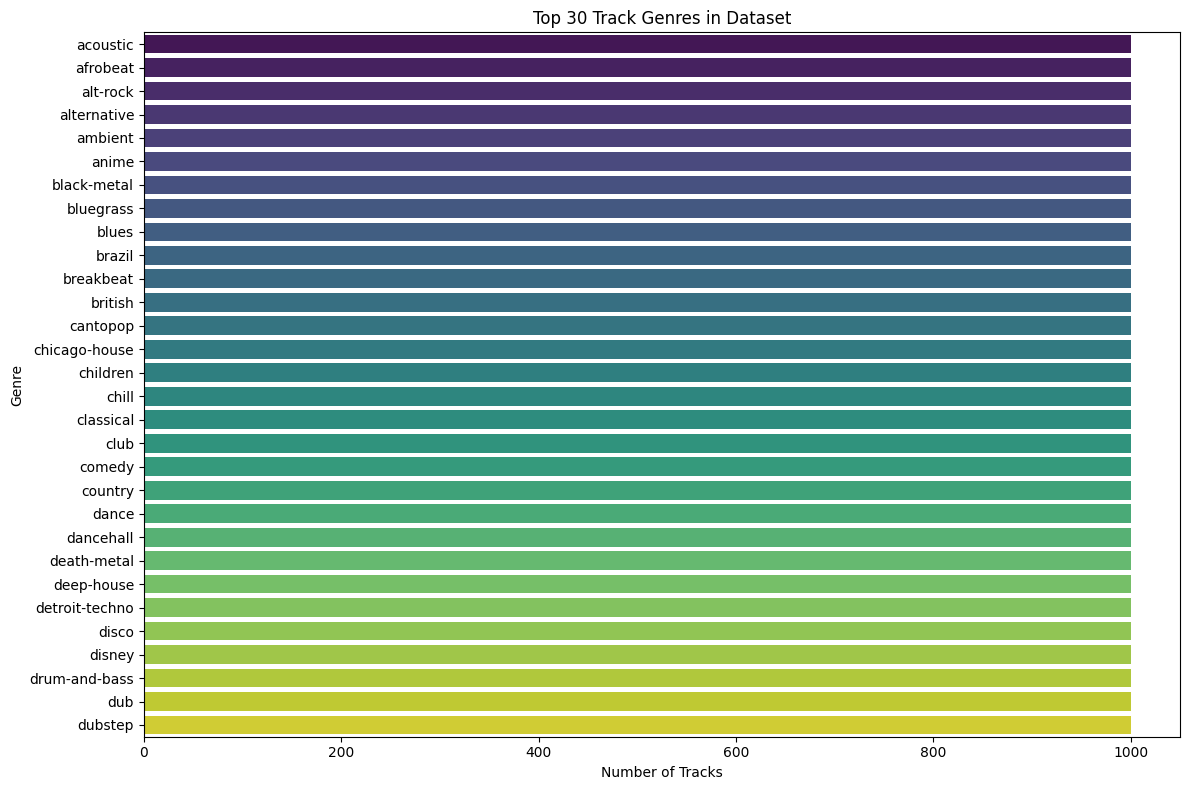

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
genre_counts = df_fe['track_genre'].value_counts().head(30)

sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')
plt.title('Top 30 Track Genres in Dataset')
plt.xlabel('Number of Tracks')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
pd.set_option('display.max_rows', None)

In [ ]:
pd.reset_option('display.max_rows')

In [ ]:
df_fe['track_genre'].value_counts()


,count
track_genre,
acoustic,1000
afrobeat,1000
alt-rock,1000
alternative,1000
ambient,1000
anime,1000
black-metal,1000
bluegrass,1000
blues,1000


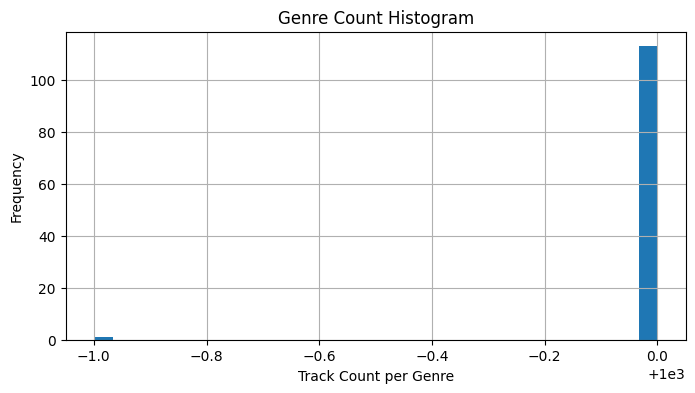

In [ ]:
df_fe['track_genre'].value_counts().plot(kind='hist', bins=30, figsize=(8, 4))
plt.title("Genre Count Histogram")
plt.xlabel("Track Count per Genre")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


##  Random Forest Genre Classifier

In [ ]:
# Drop columns that leak the target or are irrelevant
X = df_fe.drop(columns=['track_genre', 'popularity', 'popularity_log'])
y = df_fe['track_genre']



 stratify=y to preserve genre distribution in both sets

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1,            # Use all CPUs
    verbose=1
)

rf_clf.fit(X_train, y_train)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   44.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.7min finished


RandomForestClassifier(n_jobs=-1, random_state=42, verbose=1)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

y_pred = rf_clf.predict(X_test)

# Classification Report
print("✅ Classification Report:")
print(classification_report(y_test, y_pred))

# Overall Accuracy
print(f"🎯 Accuracy: {accuracy_score(y_test, y_pred):.4f}")


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    2.0s finished


✅ Classification Report:
                   precision    recall  f1-score   support

         acoustic       0.21      0.20      0.20       200
         afrobeat       0.28      0.23      0.26       200
         alt-rock       0.04      0.04      0.04       200
      alternative       0.13      0.14      0.13       200
          ambient       0.23      0.23      0.23       200
            anime       0.22      0.12      0.16       200
      black-metal       0.38      0.48      0.42       200
        bluegrass       0.30      0.42      0.35       200
            blues       0.15      0.10      0.12       200
           brazil       0.03      0.02      0.02       200
        breakbeat       0.27      0.24      0.26       200
          british       0.15      0.07      0.10       200
         cantopop       0.17      0.20      0.18       200
    chicago-house       0.39      0.51      0.44       200
         children       0.41      0.44      0.42       200
            chill       0.14  

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_test_enc = le.fit_transform(y_test)
y_pred_enc = le.transform(y_pred)
genre_labels = le.classes_


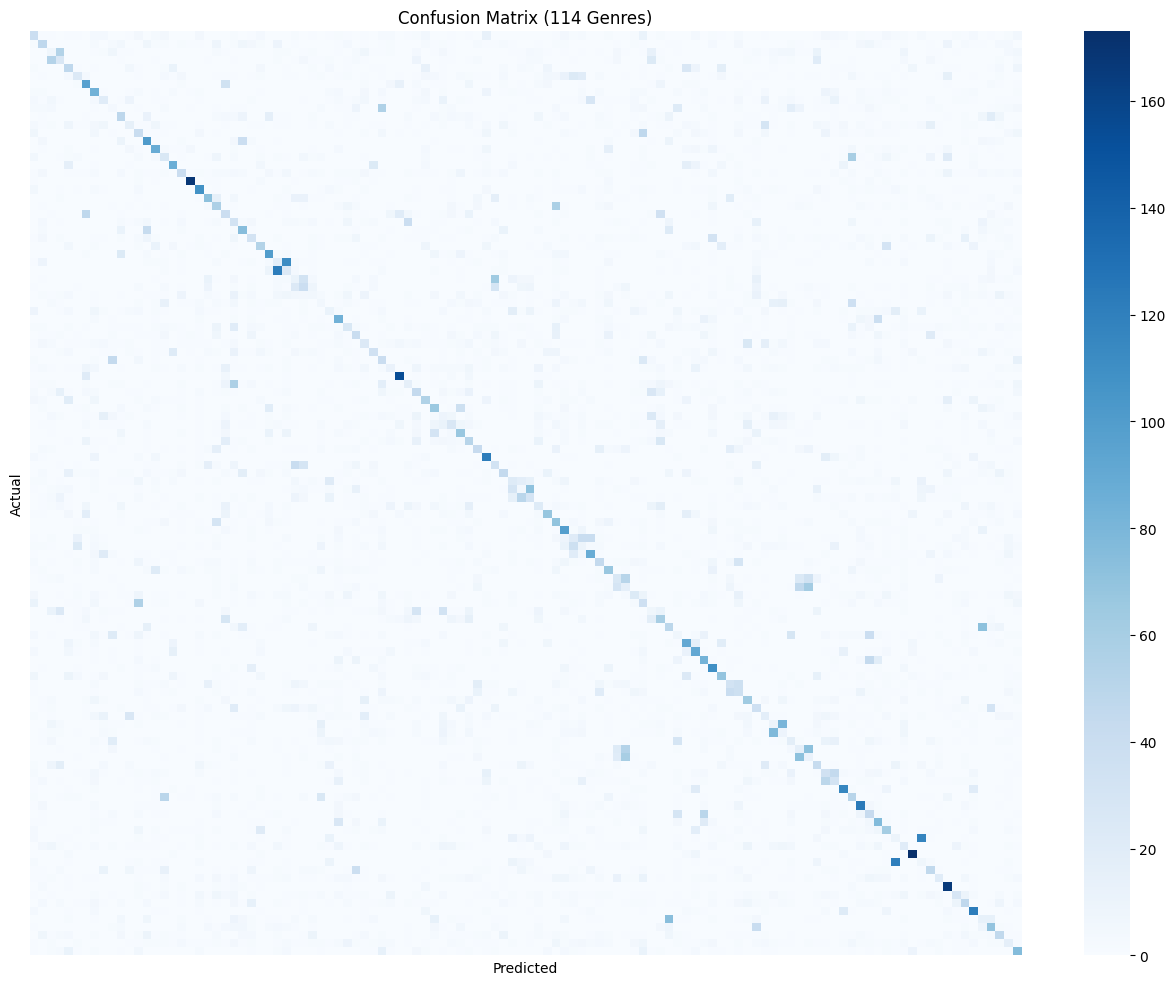

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_enc, y_pred_enc, labels=range(len(genre_labels)))

plt.figure(figsize=(16, 12))
sns.heatmap(cm, cmap='Blues', xticklabels=False, yticklabels=False)
plt.title("Confusion Matrix (114 Genres)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## Confused Genres

In [ ]:
import numpy as np

# Get most confused genre pairs
cm_df = pd.DataFrame(cm, index=genre_labels, columns=genre_labels)
confused_pairs = cm_df.stack().sort_values(ascending=False)

# Filter top confusion pairs (excluding correct predictions on diagonal)
confused_pairs = confused_pairs[confused_pairs.index.get_level_values(0) != confused_pairs.index.get_level_values(1)]
print(confused_pairs.head(10))


dubstep            dub                  122
songwriter         singer-songwriter    121
singer-songwriter  songwriter           117
dub                dubstep              112
punk               punk-rock             81
punk-rock          punk                  78
techno             minimal-techno        74
minimal-techno     techno                72
reggaeton          reggae                72
reggae             reggaeton             72
dtype: int64


In [ ]:
df_fe.columns

Index(['popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'time_signature', 'track_genre', 'popularity_log',
       'duration_min', 'log_acousticness', 'log_duration', 'log_loudness',
       'dance_valence', 'energy_dance', 'energy_speech', 'tempo_bin_encoded'],
      dtype='object')

## Feature Importance to Refine X

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

importances = rf.feature_importances_
feature_importance = pd.Series(importances, index=X.columns).sort_values(ascending=False)
print(feature_importance)


danceability         0.064823
valence              0.064281
speechiness          0.064234
duration_min         0.063297
log_duration         0.062865
dance_valence        0.061741
energy_speech        0.061739
liveness             0.060559
energy               0.060235
energy_dance         0.060105
acousticness         0.059379
log_acousticness     0.058967
log_loudness         0.058197
loudness             0.057958
instrumentalness     0.054883
key                  0.039818
tempo_bin_encoded    0.026294
mode                 0.013059
time_signature       0.007565
dtype: float64


## Random forest classifier with top features

In [ ]:
top_features = [
    'danceability', 'valence', 'speechiness', 'duration_min', 'log_duration',
    'dance_valence', 'energy_speech', 'liveness', 'energy', 'energy_dance',
    'acousticness', 'log_acousticness', 'log_loudness', 'loudness', 'instrumentalness'
]

In [ ]:
X_top = df_fe[top_features]
y = df_fe['track_genre']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_top, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1,            # Use all CPUs
    verbose=1
)

rf_clf.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   45.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.6min finished


RandomForestClassifier(n_jobs=-1, random_state=42, verbose=1)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

y_pred = rf_clf.predict(X_test)

# Classification Report
print("✅ Classification Report:")
print(classification_report(y_test, y_pred))

# Overall Accuracy
print(f"🎯 Accuracy: {accuracy_score(y_test, y_pred):.4f}")

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    1.7s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    3.4s finished


✅ Classification Report:
                   precision    recall  f1-score   support

         acoustic       0.21      0.18      0.20       200
         afrobeat       0.26      0.21      0.23       200
         alt-rock       0.04      0.04      0.04       200
      alternative       0.13      0.14      0.13       200
          ambient       0.26      0.25      0.25       200
            anime       0.19      0.10      0.13       200
      black-metal       0.38      0.47      0.42       200
        bluegrass       0.31      0.38      0.34       200
            blues       0.13      0.10      0.11       200
           brazil       0.03      0.02      0.02       200
        breakbeat       0.27      0.25      0.26       200
          british       0.17      0.10      0.13       200
         cantopop       0.17      0.22      0.19       200
    chicago-house       0.39      0.49      0.43       200
         children       0.42      0.46      0.43       200
            chill       0.12  

In [ ]:
selected_features = [
    'danceability', 'valence', 'speechiness', 'duration_min', 'log_duration',
    'dance_valence', 'energy_speech', 'liveness', 'energy', 'energy_dance',
    'acousticness', 'log_acousticness', 'log_loudness', 'loudness', 'instrumentalness',
     'mode'
]

X_selected = df_fe[selected_features]
y = df_fe['track_genre']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1,            # Use all CPUs
    verbose=1
)

rf_clf.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   52.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.8min finished


RandomForestClassifier(n_jobs=-1, random_state=42, verbose=1)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

y_pred = rf_clf.predict(X_test)

# Classification Report
print("✅ Classification Report:")
print(classification_report(y_test, y_pred))

# Overall Accuracy
print(f"🎯 Accuracy: {accuracy_score(y_test, y_pred):.4f}")

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    1.6s finished


✅ Classification Report:
                   precision    recall  f1-score   support

         acoustic       0.23      0.21      0.22       200
         afrobeat       0.30      0.26      0.28       200
         alt-rock       0.05      0.04      0.04       200
      alternative       0.14      0.14      0.14       200
          ambient       0.22      0.22      0.22       200
            anime       0.19      0.11      0.14       200
      black-metal       0.37      0.47      0.41       200
        bluegrass       0.31      0.41      0.35       200
            blues       0.14      0.10      0.11       200
           brazil       0.03      0.02      0.02       200
        breakbeat       0.28      0.24      0.26       200
          british       0.15      0.08      0.10       200
         cantopop       0.18      0.23      0.20       200
    chicago-house       0.38      0.50      0.43       200
         children       0.43      0.48      0.46       200
            chill       0.12  

## XGBoost Classifier

In [ ]:
selected_features = [
    'danceability', 'valence', 'speechiness', 'duration_min', 'log_duration',
    'dance_valence', 'energy_speech', 'liveness', 'energy', 'energy_dance',
    'acousticness', 'log_acousticness', 'log_loudness', 'loudness', 'instrumentalness',
     'mode'
]

X_selected = df_fe[selected_features]
y = df_fe['track_genre']

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [ ]:
from sklearn.model_selection import train_test_split

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)

In [ ]:
# Fit XGBoost with encoded target
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

xgb_model = XGBClassifier(n_estimators=200, max_depth=10, learning_rate=0.1,
                          use_label_encoder=False, eval_metric='mlogloss', verbosity=0)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
# Predict and evaluate
y_pred = xgb_model.predict(X_test)
print("🎯 Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_))

🎯 Accuracy: 0.2319298245614035
                   precision    recall  f1-score   support

         acoustic       0.19      0.17      0.18       300
         afrobeat       0.25      0.25      0.25       300
         alt-rock       0.03      0.03      0.03       300
      alternative       0.14      0.11      0.12       300
          ambient       0.22      0.24      0.23       300
            anime       0.13      0.10      0.11       300
      black-metal       0.37      0.40      0.38       300
        bluegrass       0.33      0.38      0.36       300
            blues       0.08      0.05      0.06       300
           brazil       0.03      0.03      0.03       300
        breakbeat       0.27      0.22      0.24       300
          british       0.09      0.05      0.07       300
         cantopop       0.20      0.21      0.20       300
    chicago-house       0.39      0.41      0.40       300
         children       0.45      0.38      0.41       300
            chill       

In [ ]:
import joblib

joblib.dump(xgb_model, "/content/drive/MyDrive/Audio_Genre_ML/xgb_genre_model.pkl")

['/content/drive/MyDrive/Audio_Genre_ML/xgb_genre_model.pkl']

In [ ]:
import joblib
xgb_model = joblib.load("/content/drive/MyDrive/Audio_Genre_ML/xgb_genre_model.pkl")

## Cross-Validation (to confirm generalization)

In [ ]:
from sklearn.model_selection import cross_val_score
import xgboost as xgb

xgb_model = xgb.XGBClassifier(n_jobs=-1, use_label_encoder=False, eval_metric='mlogloss')

scores = cross_val_score(xgb_model, X_selected, y_encoded, cv=5, scoring='accuracy')
print("Cross-validation scores:", scores)
print("Average Accuracy:", scores.mean())


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:59:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:03:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:07:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:10:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:14:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Cross-validation scores: [0.17754386 0.18995614 0.19188596 0.19065789 0.18917496]
Average Accuracy: 0.18784376469266506


## Confusion Matrix (visualize most confused genres):

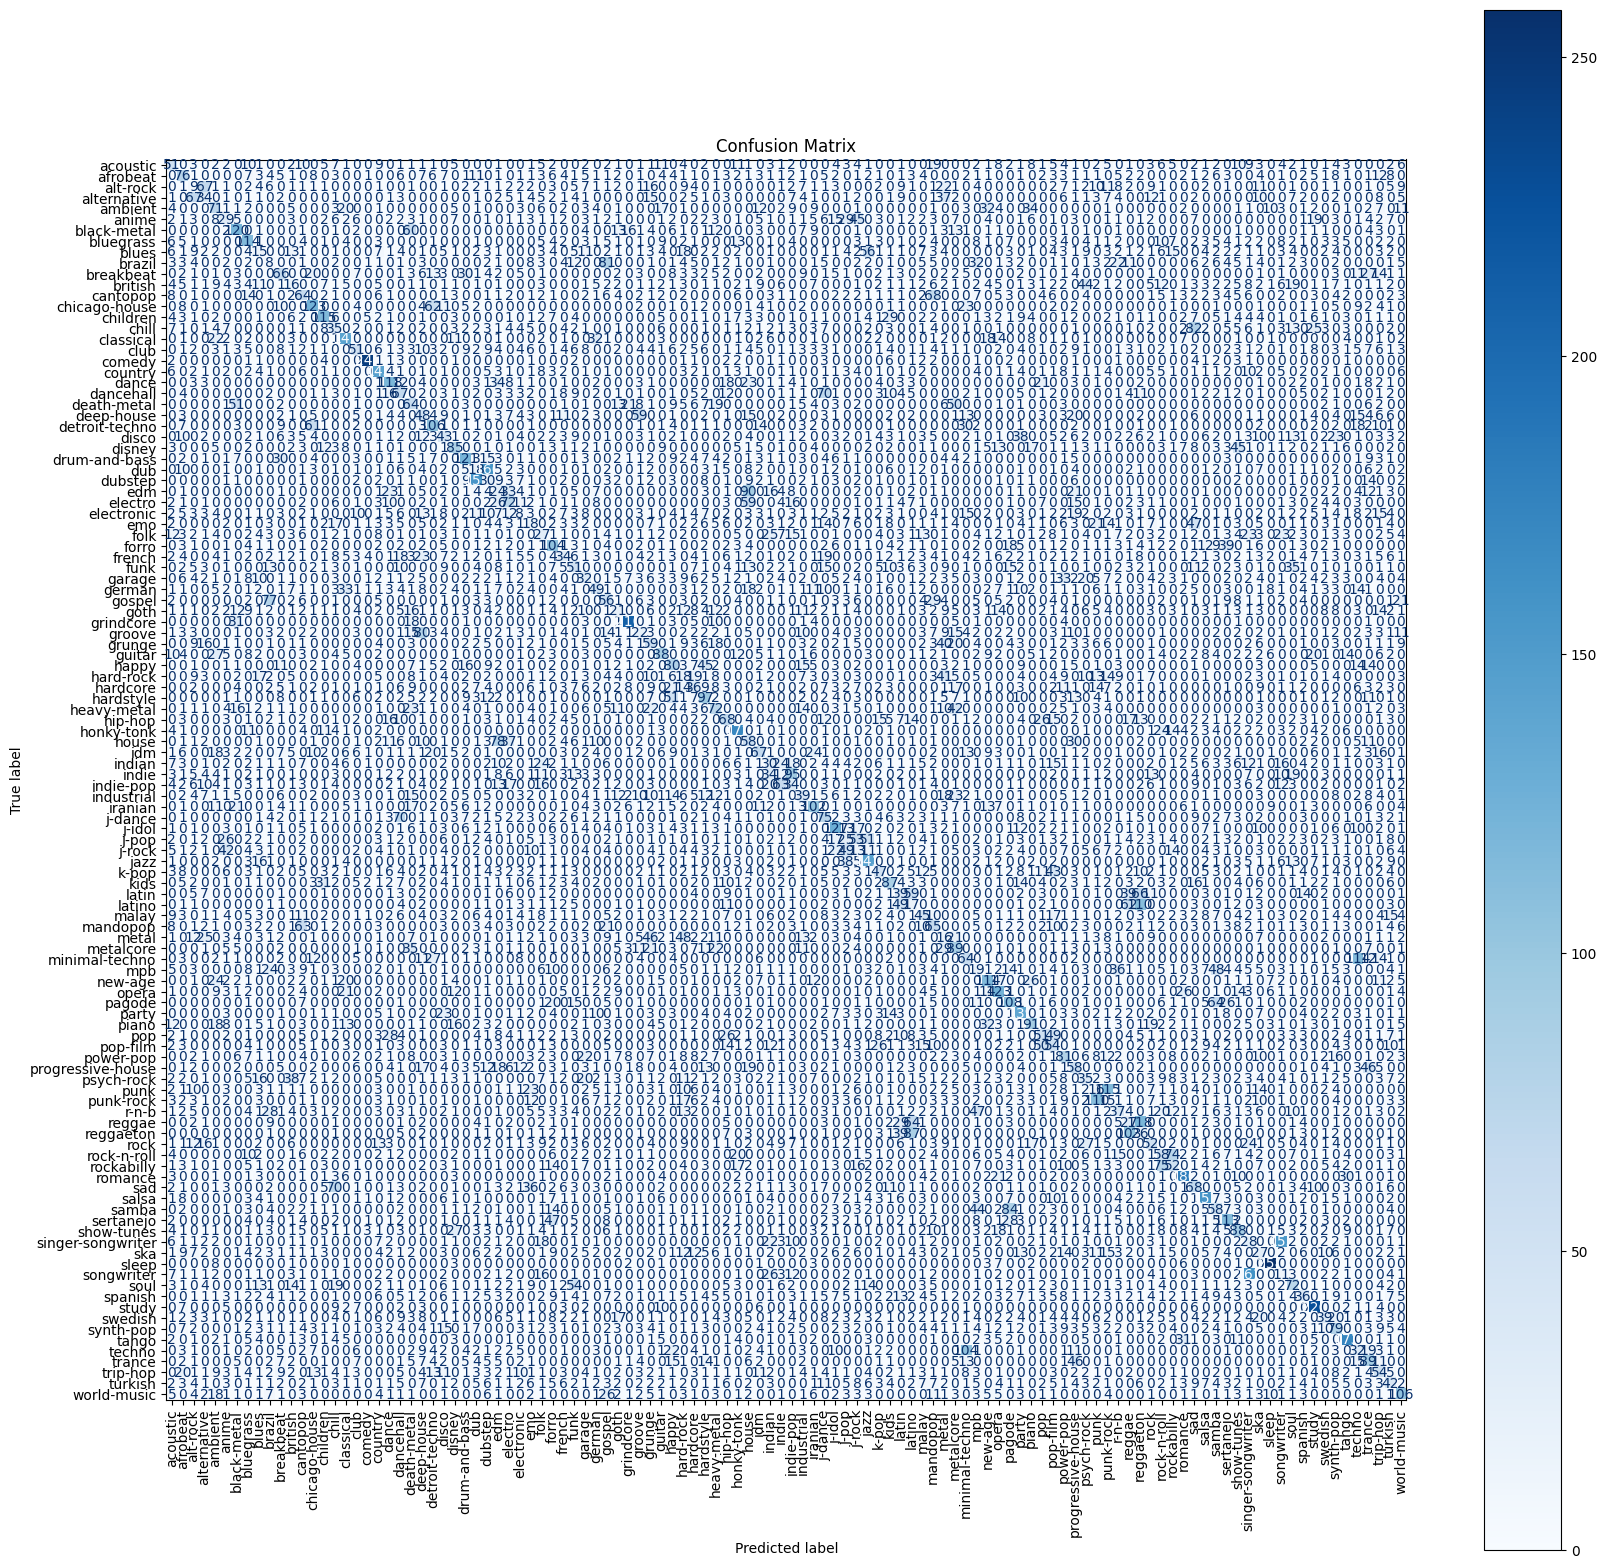

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = xgb_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
fig, ax = plt.subplots(figsize=(20, 20))
disp.plot(ax=ax, xticks_rotation=90, cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


## Top confused genre pairs

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix

# Predict
y_pred = xgb_model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = le.classes_  # Label encoder classes

# Convert to DataFrame for easier manipulation
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

# Flatten the matrix and sort top confused pairs (excluding diagonal)
confused_pairs = []

for i in range(len(labels)):
    for j in range(len(labels)):
        if i != j and cm_df.iloc[i, j] > 0:
            confused_pairs.append((labels[i], labels[j], cm_df.iloc[i, j]))

# Sort by confusion count descending
confused_pairs_sorted = sorted(confused_pairs, key=lambda x: x[2], reverse=True)

# Convert to DataFrame and show top N confused pairs
top_n = 25
confusion_summary = pd.DataFrame(confused_pairs_sorted[:top_n],
                                 columns=["Actual", "Predicted", "Count"])

print("\n🔁 Top Confused Genre Pairs:")
print(confusion_summary.to_string(index=False))




🔁 Top Confused Genre Pairs:
           Actual         Predicted  Count
       songwriter singer-songwriter    161
              dub           dubstep    160
          dubstep               dub    157
singer-songwriter        songwriter    153
           reggae         reggaeton    118
             punk         punk-rock    115
   minimal-techno            techno    114
           latino         reggaeton    110
        punk-rock              punk    110
           techno    minimal-techno    104
        reggaeton            reggae    103
            indie         indie-pop     95
              edm             house     90
        reggaeton            latino     87
            samba            pagode     84
            chill               sad     82
           brazil            gospel     81
           groove        deep-house     80
            house               edm     78
           gospel            brazil     77
       rockabilly       rock-n-roll     75
      rock-n-roll        

In [ ]:
merge_map = {
    'songwriter': 'singer-songwriter',
    'dub': 'dubstep',
    'reggae': 'reggaeton',
    'punk': 'punk-rock',
    'minimal-techno': 'techno',
    'latino': 'reggaeton',
    'indie': 'indie-pop',
    'edm': 'house',
    'samba': 'pagode',
    'chill': 'sad',
    'groove': 'deep-house',
    'gospel': 'brazil',
    'rockabilly': 'rock-n-roll',
    'dancehall': 'j-dance',
    'sad': 'chill'
}


In [ ]:
df_fe['track_genre_merged'] = df_fe['track_genre'].replace(merge_map)


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(df_fe['track_genre_merged'])
X = df_fe[selected_features]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(tree_method="hist", use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:58:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = xgb_model.predict(X_test)
print("🎯 Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_))


🎯 Accuracy: 0.2887426900584795
                   precision    recall  f1-score   support

         acoustic       0.15      0.10      0.12       311
         afrobeat       0.20      0.15      0.18       297
         alt-rock       0.05      0.03      0.04       313
      alternative       0.18      0.14      0.16       293
          ambient       0.17      0.21      0.19       275
            anime       0.09      0.06      0.07       277
      black-metal       0.40      0.40      0.40       319
        bluegrass       0.31      0.33      0.32       301
            blues       0.18      0.13      0.15       322
           brazil       0.29      0.34      0.31       584
        breakbeat       0.21      0.21      0.21       285
          british       0.11      0.05      0.07       317
         cantopop       0.19      0.22      0.21       301
    chicago-house       0.36      0.34      0.35       294
         children       0.44      0.36      0.39       303
            chill       

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = xgb_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=le.classes_, output_dict=True)

# To see top misclassified genre pairs
import pandas as pd
cm_df = pd.DataFrame(cm, index=le.classes_, columns=le.classes_)
confusion_pairs = []

for actual in cm_df.index:
    for predicted in cm_df.columns:
        if actual != predicted and cm_df.loc[actual, predicted] > 30:
            confusion_pairs.append((actual, predicted, cm_df.loc[actual, predicted]))

confusion_df = pd.DataFrame(confusion_pairs, columns=['Actual', 'Predicted', 'Count'])
confusion_df = confusion_df.sort_values(by='Count', ascending=False)
print(confusion_df.head(20))


            Actual          Predicted  Count
51           latin          reggaeton    190
73             sad              chill     89
21         electro              house     87
4      black-metal        death-metal     66
44         j-dance          reggaeton     65
12           dance              house     64
56             mpb             pagode     63
8         cantopop           mandopop     62
18  detroit-techno             techno     62
24            folk  singer-songwriter     58
34         hip-hop          reggaeton     56
11           chill                sad     55
45           j-pop             j-rock     55
13     death-metal        black-metal     54
32       hardstyle              happy     54
48            jazz              blues     54
43       indie-pop  singer-songwriter     54
37           house            electro     53
58          pagode          sertanejo     53
35      honky-tonk        rock-n-roll     52


## Genre Merging

In [ ]:
# Define the mapping
genre_merge_map = {
    'songwriter': 'singer-songwriter',
    'singer-songwriter': 'singer-songwriter',
    'dub': 'dubstep',
    'dubstep': 'dubstep',
    'reggae': 'reggae',
    'reggaeton': 'reggae',
    'punk': 'punk',
    'punk-rock': 'punk',
    'techno': 'techno',
    'minimal-techno': 'techno',
    'latino': 'latin',
    'reggaeton': 'latin',
    'latin': 'latin',
    'edm': 'house',
    'house': 'house',
    'chill': 'chill-sad',
    'sad': 'chill-sad',
    'gospel': 'gospel-brazil',
    'brazil': 'gospel-brazil',
    'rock-n-roll': 'rock-n-roll',
    'rockabilly': 'rock-n-roll',
    'dancehall': 'dancehall',
    'j-dance': 'dancehall',
    'indie': 'indie-pop',
    'indie-pop': 'indie-pop',
    'pagode': 'pagode-samba',
    'samba': 'pagode-samba',
    'electro': 'electro',
    'electronic': 'electro',
    'pop': 'pop',
    'pop-film': 'pop',
    'power-pop': 'pop',
    'ambient': 'ambient-classical',
    'classical': 'ambient-classical'
}

# Apply mapping
df_fe['merged_genre'] = df_fe['track_genre'].map(genre_merge_map).fillna(df_fe['track_genre'])



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# X: your selected features
X = df_fe[selected_features]  # already filtered features
y = df_fe['merged_genre']     # merged target

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)


## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Train model
rf_model = RandomForestClassifier(n_estimators=150, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate
print("🎯 Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf, target_names=le.classes_))


🎯 Random Forest Accuracy: 0.3231578947368421
                   precision    recall  f1-score   support

         acoustic       0.20      0.16      0.18       300
         afrobeat       0.26      0.19      0.22       300
         alt-rock       0.04      0.04      0.04       300
      alternative       0.14      0.12      0.13       300
ambient-classical       0.41      0.48      0.44       600
            anime       0.15      0.09      0.11       300
      black-metal       0.35      0.44      0.39       300
        bluegrass       0.29      0.32      0.30       300
            blues       0.10      0.06      0.07       300
        breakbeat       0.27      0.20      0.23       300
          british       0.13      0.08      0.10       300
         cantopop       0.18      0.20      0.19       300
    chicago-house       0.37      0.46      0.41       300
         children       0.45      0.41      0.43       300
        chill-sad       0.31      0.47      0.37       600
          

## XGBoost Classifier

In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score

# Train model
xgb_model = xgb.XGBClassifier(n_estimators=150, learning_rate=0.1, max_depth=8, random_state=42, n_jobs=-1)
xgb_model.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate
print("🎯 XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb, target_names=le.classes_))


🎯 XGBoost Accuracy: 0.30760233918128654
                   precision    recall  f1-score   support

         acoustic       0.22      0.15      0.18       300
         afrobeat       0.22      0.20      0.21       300
         alt-rock       0.04      0.03      0.03       300
      alternative       0.21      0.11      0.15       300
ambient-classical       0.39      0.46      0.42       600
            anime       0.14      0.09      0.11       300
      black-metal       0.37      0.41      0.39       300
        bluegrass       0.32      0.35      0.34       300
            blues       0.07      0.03      0.04       300
        breakbeat       0.27      0.20      0.23       300
          british       0.11      0.05      0.07       300
         cantopop       0.20      0.25      0.22       300
    chicago-house       0.36      0.42      0.39       300
         children       0.46      0.40      0.43       300
        chill-sad       0.29      0.46      0.35       600
             cl

In [ ]:
import joblib

joblib.dump(xgb_model, "/content/drive/MyDrive/Audio_Genre_ML/xgb_merged_genre_model.pkl")

['/content/drive/MyDrive/Audio_Genre_ML/xgb_merged_genre_model.pkl']

## Cross-Validation (for XGBoost)

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(xgb_model, X, y_encoded, cv=5, scoring='accuracy')
print("Cross-validation scores:", scores)
print("Average Accuracy:", scores.mean())


Cross-validation scores: [0.28280702 0.27785088 0.28285088 0.27210526 0.26031844]
Average Accuracy: 0.2751864940213598


## LightGBM Classifier

In [ ]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report

lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)

y_pred_lgb = lgb_model.predict(X_test)
print("LightGBM Accuracy:", accuracy_score(y_test, y_pred_lgb))
print(classification_report(y_test, y_pred_lgb, target_names=le.classes_))


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.049132 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3827
[LightGBM] [Info] Number of data points in the train set: 79799, number of used features: 16
[LightGBM] [Info] Start training from score -4.736186
[LightGBM] [Info] Start training from score -4.736186
[LightGBM] [Info] Start training from score -4.736186
[LightGBM] [Info] Start training from score -4.736186
[LightGBM] [Info] Start training from score -4.043039
[LightGBM] [Info] Start training from score -4.736186
[LightGBM] [Info] Start training from score -4.736186
[LightGBM] [Info] Start training from score -4.736186
[LightGBM] [Info] Start training from score -4.736186
[LightGBM] [Info] Start training from score -4.736186
[LightGBM] [Info] Start training from score -4.736186
[LightGBM] [Info] Start training from score -4.736186
[LightGBM] [Info] Start training from score -4.736186
[LightGBM

In [ ]:
from catboost import CatBoostClassifier

cat_model = CatBoostClassifier(verbose=100, random_state=42)
cat_model.fit(X_train, y_train)


Learning rate set to 0.098929
0:	learn: 4.3378658	total: 5.27s	remaining: 1h 27m 46s
100:	learn: 2.9121388	total: 4m 57s	remaining: 44m 6s
200:	learn: 2.7155432	total: 9m 28s	remaining: 37m 39s
300:	learn: 2.5721570	total: 14m 6s	remaining: 32m 45s
400:	learn: 2.4529896	total: 18m 38s	remaining: 27m 50s
500:	learn: 2.3392050	total: 23m 9s	remaining: 23m 4s
600:	learn: 2.2416208	total: 27m 47s	remaining: 18m 27s
700:	learn: 2.1443377	total: 32m 22s	remaining: 13m 48s
800:	learn: 2.0567856	total: 37m	remaining: 9m 11s
900:	learn: 1.9665666	total: 41m 33s	remaining: 4m 34s
999:	learn: 1.8822472	total: 46m 3s	remaining: 0us


NameError: name 'accuracy_score' is not defined

In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# Predict & Evaluate
y_pred_cat = cat_model.predict(X_test)
print("CatBoost Accuracy:", accuracy_score(y_test, y_pred_cat))
print(classification_report(y_test, y_pred_cat, target_names=le.classes_))

CatBoost Accuracy: 0.29780701754385963
                   precision    recall  f1-score   support

         acoustic       0.19      0.13      0.15       300
         afrobeat       0.23      0.19      0.21       300
         alt-rock       0.03      0.01      0.02       300
      alternative       0.22      0.08      0.12       300
ambient-classical       0.39      0.47      0.43       600
            anime       0.20      0.12      0.15       300
      black-metal       0.40      0.43      0.42       300
        bluegrass       0.28      0.35      0.31       300
            blues       0.13      0.04      0.07       300
        breakbeat       0.23      0.20      0.21       300
          british       0.18      0.05      0.07       300
         cantopop       0.22      0.27      0.24       300
    chicago-house       0.34      0.44      0.39       300
         children       0.43      0.38      0.40       300
        chill-sad       0.26      0.43      0.33       600
             clu

## Top-5 Accuracy for Random Forest

In [ ]:
selected_features = [
    'danceability', 'valence', 'speechiness', 'duration_min', 'log_duration',
    'dance_valence', 'energy_speech', 'liveness', 'energy', 'energy_dance',
    'acousticness', 'log_acousticness', 'log_loudness', 'loudness', 'instrumentalness',
     'mode'
]

X_selected = df_fe[selected_features]
y = df_fe['track_genre']

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Step 1: Encode labels on the FULL dataset before splitting
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # y = df_fe['track_genre'] (before any train/test split)

# Step 2: Now safely split encoded labels
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score

# Set N (Top-N accuracy)
N = 5  # Change to 5 for Top-5

# Get predicted probabilities
y_proba = rf_model.predict_proba(X_test)

# Get Top-N predictions
top_n_preds = np.argsort(y_proba, axis=1)[:, -N:]  # Get indices of top N probabilities per sample

# Calculate Top-N Accuracy
top_n_correct = [y_test[i] in top_n_preds[i] for i in range(len(y_test))]
top_n_accuracy = np.mean(top_n_correct)

print(f"🎯 Top-{N} Accuracy: {top_n_accuracy:.4f}")


🎯 Top-5 Accuracy: 0.0792


## Super-Genres Mapping

In [ ]:
super_genres = {
    'rock': ['rock', 'rock-n-roll', 'punk', 'punk-rock', 'grunge', 'psych-rock', 'hard-rock'],
    'pop': ['pop', 'indie-pop', 'synth-pop', 'pop-film', 'power-pop'],
    'electronic': ['electronic', 'edm', 'electro', 'techno', 'trance', 'dubstep', 'house', 'deep-house', 'minimal-techno'],
    'metal': ['metal', 'heavy-metal', 'death-metal', 'black-metal', 'metalcore', 'grindcore'],
    'hiphop': ['hip-hop', 'rap', 'r-n-b'],
    'japanese': ['j-pop', 'j-rock', 'j-dance', 'j-idol'],
    'latin': ['reggaeton', 'reggae', 'salsa', 'brazil', 'latino', 'samba', 'mpb', 'pagode'],
    'classical': ['classical', 'piano', 'opera', 'new-age'],
    'country': ['country', 'honky-tonk'],
    'folk': ['folk', 'acoustic', 'bluegrass'],
    'ambient': ['ambient', 'study', 'sleep', 'chill'],
    'world': ['indian', 'turkish', 'iranian', 'mandopop', 'cantopop', 'malay', 'world-music'],
    'children': ['children', 'disney', 'kids'],
    'other': ['gospel', 'funk', 'jazz', 'blues', 'soul', 'show-tunes', 'comedy']
}


## Apply the Mapping

In [ ]:
def map_super_genre(genre):
    for super_genre, subgenres in super_genres.items():
        if genre in subgenres:
            return super_genre
    return 'misc'

df_fe['super_genre'] = df_fe['track_genre'].apply(map_super_genre)


## Re-train the Model

Use 'super_genre' as the new target

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score

X = df_fe[selected_features]
y = df_fe['super_genre']

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Random Forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
from sklearn.metrics import classification_report, accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_))


Accuracy: 0.5199122807017544
              precision    recall  f1-score   support

     ambient       0.60      0.45      0.52      1152
    children       0.67      0.35      0.46       890
   classical       0.58      0.57      0.58      1181
     country       0.70      0.50      0.59       613
  electronic       0.58      0.42      0.49      2728
        folk       0.34      0.12      0.18       920
      hiphop       0.22      0.09      0.12       582
    japanese       0.47      0.23      0.31      1235
       latin       0.61      0.58      0.59      2369
       metal       0.61      0.59      0.60      1782
        misc       0.50      0.75      0.60     12918
       other       0.56      0.39      0.46      2150
         pop       0.42      0.19      0.26      1500
        rock       0.42      0.26      0.33      2141
       world       0.43      0.30      0.35      2039

    accuracy                           0.52     34200
   macro avg       0.52      0.39      0.43     342

## Compute Top-3 Accuracy

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)


In [ ]:
import numpy as np

# Predict probabilities for all classes
y_proba = model.predict_proba(X_test)

# Get Top-3 predicted class indices
top3_preds = np.argsort(y_proba, axis=1)[:, -3:]


In [ ]:
# Check if true label is among Top-3 predictions
correct = 0
for i in range(len(y_test_encoded)):
    if y_test_encoded[i] in top3_preds[i]:
        correct += 1

top3_accuracy = correct / len(y_test_encoded)
print(f"🎯 Top-3 Accuracy: {top3_accuracy:.4f}")


🎯 Top-3 Accuracy: 0.8062


In [ ]:
import numpy as np

# Predict probabilities for all classes
y_proba = model.predict_proba(X_test)

# Get Top-5 predicted class indices
top5_preds = np.argsort(y_proba, axis=1)[:, -5:]

In [ ]:
# Check if true label is among Top-5 predictions
correct = 0
for i in range(len(y_test_encoded)):
    if y_test_encoded[i] in top5_preds[i]:
        correct += 1

top5_accuracy = correct / len(y_test_encoded)
print(f"🎯 Top-5 Accuracy: {top5_accuracy:.4f}")

🎯 Top-5 Accuracy: 0.8880


## Interpretation:

Standard accuracy (51.99%) means model gets the genre right on the first guess about half the time — solid for 15-class multiclass classification.

Top-3 accuracy (80.62%) and Top-5 accuracy (88.80%) show that model is very good at narrowing down the correct genre into a small set, which is great for recommendation systems, playlists, or genre suggestion tools.

In [ ]:
df= df_fe.copy()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import joblib
import warnings
warnings.filterwarnings('ignore')

# Load your DataFrame (replace with your data loading code)
df = df_fe.copy()

# Define manual clusters
clusters = {
    'Pop & Related': ['pop', 'indie-pop', 'power-pop', 'synth-pop', 'j-pop', 'k-pop', 'cantopop', 'mandopop', 'pop-film', 'j-idol'],
    'Rock & Alternative': ['rock', 'alt-rock', 'indie', 'punk', 'punk-rock', 'grunge', 'hard-rock', 'psych-rock', 'rock-n-roll', 'rockabilly'],
    'Metal & Hardcore': ['metal', 'heavy-metal', 'black-metal', 'death-metal', 'metalcore', 'grindcore', 'hardcore'],
    'Electronic & Dance': ['edm', 'house', 'deep-house', 'progressive-house', 'chicago-house', 'detroit-techno', 'techno', 'minimal-techno', 'trance', 'electro', 'electronic', 'drum-and-bass', 'dubstep', 'j-dance'],
    'Hip-Hop & R&B': ['hip-hop', 'r-n-b', 'dancehall', 'reggaeton'],
    'Folk & Acoustic': ['folk', 'acoustic', 'singer-songwriter', 'songwriter', 'bluegrass', 'honky-tonk', 'guitar'],
    'Jazz & Soul': ['jazz', 'soul', 'blues', 'gospel'],
    'Classical & Orchestral': ['classical', 'opera', 'piano', 'new-age', 'show-tunes'],
    'World & Regional': ['latin', 'latino', 'salsa', 'tango', 'samba', 'pagode', 'sertanejo', 'brazil', 'forro', 'mpb', 'indian', 'iranian', 'turkish', 'spanish', 'french', 'german', 'swedish', 'british', 'malay', 'world-music', 'reggae', 'dub', 'ska', 'afrobeat', 'j-rock'],
    'Specialty & Other': ['ambient', 'chill', 'sleep', 'study', 'disney', 'kids', 'children', 'comedy', 'anime', 'party', 'happy', 'sad', 'romance', 'emo', 'goth', 'industrial', 'funk', 'groove', 'breakbeat', 'garage', 'hardstyle', 'idm', 'trip-hop']
}

# Create broad category column
def assign_broad_category(genre):
    for category, genres in clusters.items():
        if genre in genres:
            return category
    return 'Unknown'

df['broad_category'] = df['track_genre'].apply(assign_broad_category)

# Find genres not in clusters
all_clustered_genres = [genre for sublist in clusters.values() for genre in sublist]
missing_genres = df[~df['track_genre'].isin(all_clustered_genres)]['track_genre'].unique().tolist()

# Add missing genres to a 'misc' category
if missing_genres:
    clusters['misc'] = missing_genres

# Re-apply the mapping with the updated clusters
def assign_broad_category_updated(genre):
    for category, genres in clusters.items():
        if genre in genres:
            return category
    return 'Unknown' # Should not happen after adding missing genres

df['broad_category'] = df['track_genre'].apply(assign_broad_category_updated)


# Verify no 'Unknown' categories
assert df['broad_category'].ne('Unknown').all(), "Some genres were not assigned to a cluster!"

# Features to use
numerical_cols = ['popularity', 'danceability', 'energy', 'loudness', 'speechiness',
                  'acousticness', 'instrumentalness', 'liveness', 'valence',
                  'popularity_log', 'duration_min', 'log_acousticness',
                  'log_duration', 'log_loudness', 'dance_valence', 'energy_dance',
                  'energy_speech']
categorical_cols = ['key', 'mode', 'time_signature', 'tempo_bin_encoded']
all_features = numerical_cols + categorical_cols

In [ ]:
# Step 1: Preprocess Data
# Scale numerical features
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Encode categorical features (if not already encoded)
#df = pd.get_dummies(df, columns=['key', 'mode', 'time_signature'], prefix=['key', 'mode', 'time_signature'])
#all_features = [col for col in df.columns if col in numerical_cols or col.startswith(('key_', 'mode_', 'time_signature_'))] + ['tempo_bin_encoded']

# Encode targets
le_genre = LabelEncoder()
df['track_genre_encoded'] = le_genre.fit_transform(df['track_genre'])
le_category = LabelEncoder()
df['broad_category_encoded'] = le_category.fit_transform(df['broad_category'])

In [ ]:
# Step 2: Split Data
X = df[all_features]
y_category = df['broad_category_encoded']
y_genre = df['track_genre_encoded']

X_train, X_test, y_category_train, y_category_test, y_genre_train, y_genre_test = train_test_split(
    X, y_category, y_genre, test_size=0.3, random_state=42, stratify=y_category
)

In [ ]:
# Step 3: Train Level 1 Classifier (Broad Category)
rf_level1 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_level1.fit(X_train, y_category_train)

# Evaluate Level 1
y_category_pred = rf_level1.predict(X_test)
print("Level 1 Classification Report (Broad Category):")
print(classification_report(y_category_test, y_category_pred, target_names=le_category.classes_))

Level 1 Classification Report (Broad Category):
                        precision    recall  f1-score   support

Classical & Orchestral       0.65      0.54      0.59      1500
    Electronic & Dance       0.61      0.65      0.63      4200
       Folk & Acoustic       0.58      0.54      0.56      2100
         Hip-Hop & R&B       0.26      0.16      0.20      1200
           Jazz & Soul       0.52      0.33      0.40      1200
      Metal & Hardcore       0.60      0.60      0.60      2100
         Pop & Related       0.47      0.40      0.43      3000
    Rock & Alternative       0.44      0.39      0.41      3000
     Specialty & Other       0.56      0.62      0.59      6900
      World & Regional       0.51      0.63      0.56      7500
                  misc       0.42      0.22      0.29      1500

              accuracy                           0.53     34200
             macro avg       0.51      0.46      0.48     34200
          weighted avg       0.53      0.53      0.52 

In [ ]:
# Step 4: Train Level 2 Classifiers (Specific Genres within Each Category)
level2_models = {}
for category in le_category.classes_:
    # Filter data for this category
    category_idx = le_category.transform([category])[0]
    cluster_indices_train = (y_category_train == category_idx)
    X_cluster_train = X_train[cluster_indices_train]
    y_genre_cluster_train = y_genre_train[cluster_indices_train]

    if len(y_genre_cluster_train) > 0:
        rf_level2 = RandomForestClassifier(n_estimators=100, random_state=42)
        rf_level2.fit(X_cluster_train, y_genre_cluster_train)
        level2_models[category_idx] = rf_level2

In [ ]:
# Step 5: Predict and Evaluate Hierarchical Model
y_genre_pred = np.zeros_like(y_genre_test)
for i, (x, true_category) in enumerate(zip(X_test.to_numpy(), y_category_test)):
    pred_category = rf_level1.predict([x])[0]
    if pred_category in level2_models:
        y_genre_pred[i] = level2_models[pred_category].predict([x])[0]
    else:
        y_genre_pred[i] = -1  # Fallback for empty models

# Decode predictions
y_genre_pred_decoded = le_genre.inverse_transform(y_genre_pred)
y_genre_test_decoded = le_genre.inverse_transform(y_genre_test)

# Evaluate combined model
print("\nHierarchical Classification Report (Specific Genres):")
print(classification_report(y_genre_test_decoded, y_genre_pred_decoded))


Hierarchical Classification Report (Specific Genres):
                   precision    recall  f1-score   support

         acoustic       0.23      0.18      0.20       308
         afrobeat       0.33      0.27      0.29       305
         alt-rock       0.03      0.03      0.03       290
      alternative       0.15      0.10      0.12       306
          ambient       0.31      0.33      0.32       314
            anime       0.21      0.18      0.20       315
      black-metal       0.60      0.60      0.60       295
        bluegrass       0.44      0.50      0.47       313
            blues       0.14      0.06      0.08       298
           brazil       0.10      0.16      0.12       312
        breakbeat       0.41      0.42      0.42       290
          british       0.09      0.07      0.08       281
         cantopop       0.29      0.20      0.23       285
    chicago-house       0.56      0.54      0.55       317
         children       0.40      0.48      0.44       290


In [ ]:
# Load the data
import pandas as pd
df= pd.read_pickle("/content/drive/MyDrive/Audio_Genre_ML/df_with_clusters.pkl")

In [ ]:
df.head(2)

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,cluster
0,73,230666,0,0.676,0.461,1,-6.746,0,0.1430,0.0322,0.000001,0.358,0.715,87.917,4,acoustic,3
1,55,149610,0,0.420,0.166,1,-17.235,1,0.0763,0.9240,0.000006,0.101,0.267,77.489,4,acoustic,1


## Cluster Label added as a Feature in Genre Classifier

In [ ]:
# Feature columns — include 'cluster'!
selected_features = [
    'popularity',
    'duration_ms',
    'danceability',
    'energy',
    'key',
    'loudness',
    'mode',
    'speechiness',
    'acousticness',
    'instrumentalness',
    'liveness',
    'valence',
    'tempo',
    'cluster'
]

In [ ]:
# Include cluster label as a feature
X = df[selected_features]

# Encode target genre labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(df['track_genre'])

# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a model (example: RandomForest)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Evaluate
print(classification_report(y_test, y_pred, target_names=le.classes_))

                   precision    recall  f1-score   support

         acoustic       0.22      0.20      0.21       311
         afrobeat       0.40      0.35      0.37       297
         alt-rock       0.06      0.06      0.06       313
      alternative       0.12      0.13      0.12       293
          ambient       0.30      0.35      0.32       275
            anime       0.17      0.15      0.16       277
      black-metal       0.59      0.63      0.61       319
        bluegrass       0.39      0.57      0.47       301
            blues       0.20      0.15      0.17       322
           brazil       0.11      0.09      0.10       292
        breakbeat       0.52      0.45      0.48       285
          british       0.12      0.05      0.07       317
         cantopop       0.32      0.29      0.30       301
    chicago-house       0.56      0.53      0.54       294
         children       0.49      0.49      0.49       303
            chill       0.17      0.19      0.18       

##  Feature Importance Check

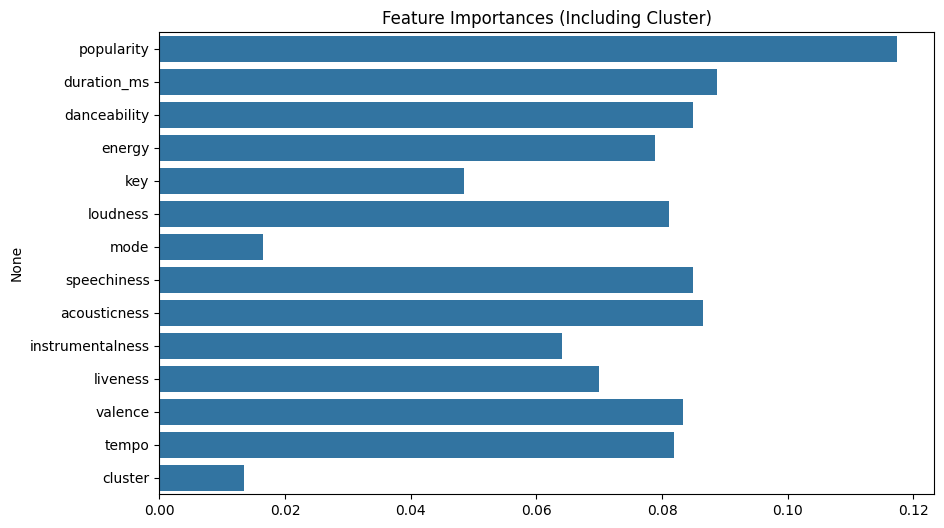

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming clf is your trained model
feature_importances = clf.feature_importances_
features = X_train.columns

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features)
plt.title("Feature Importances (Including Cluster)")
plt.show()


## Genre Distribution per Cluster

/tmp/ipython-input-10-1722608556.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


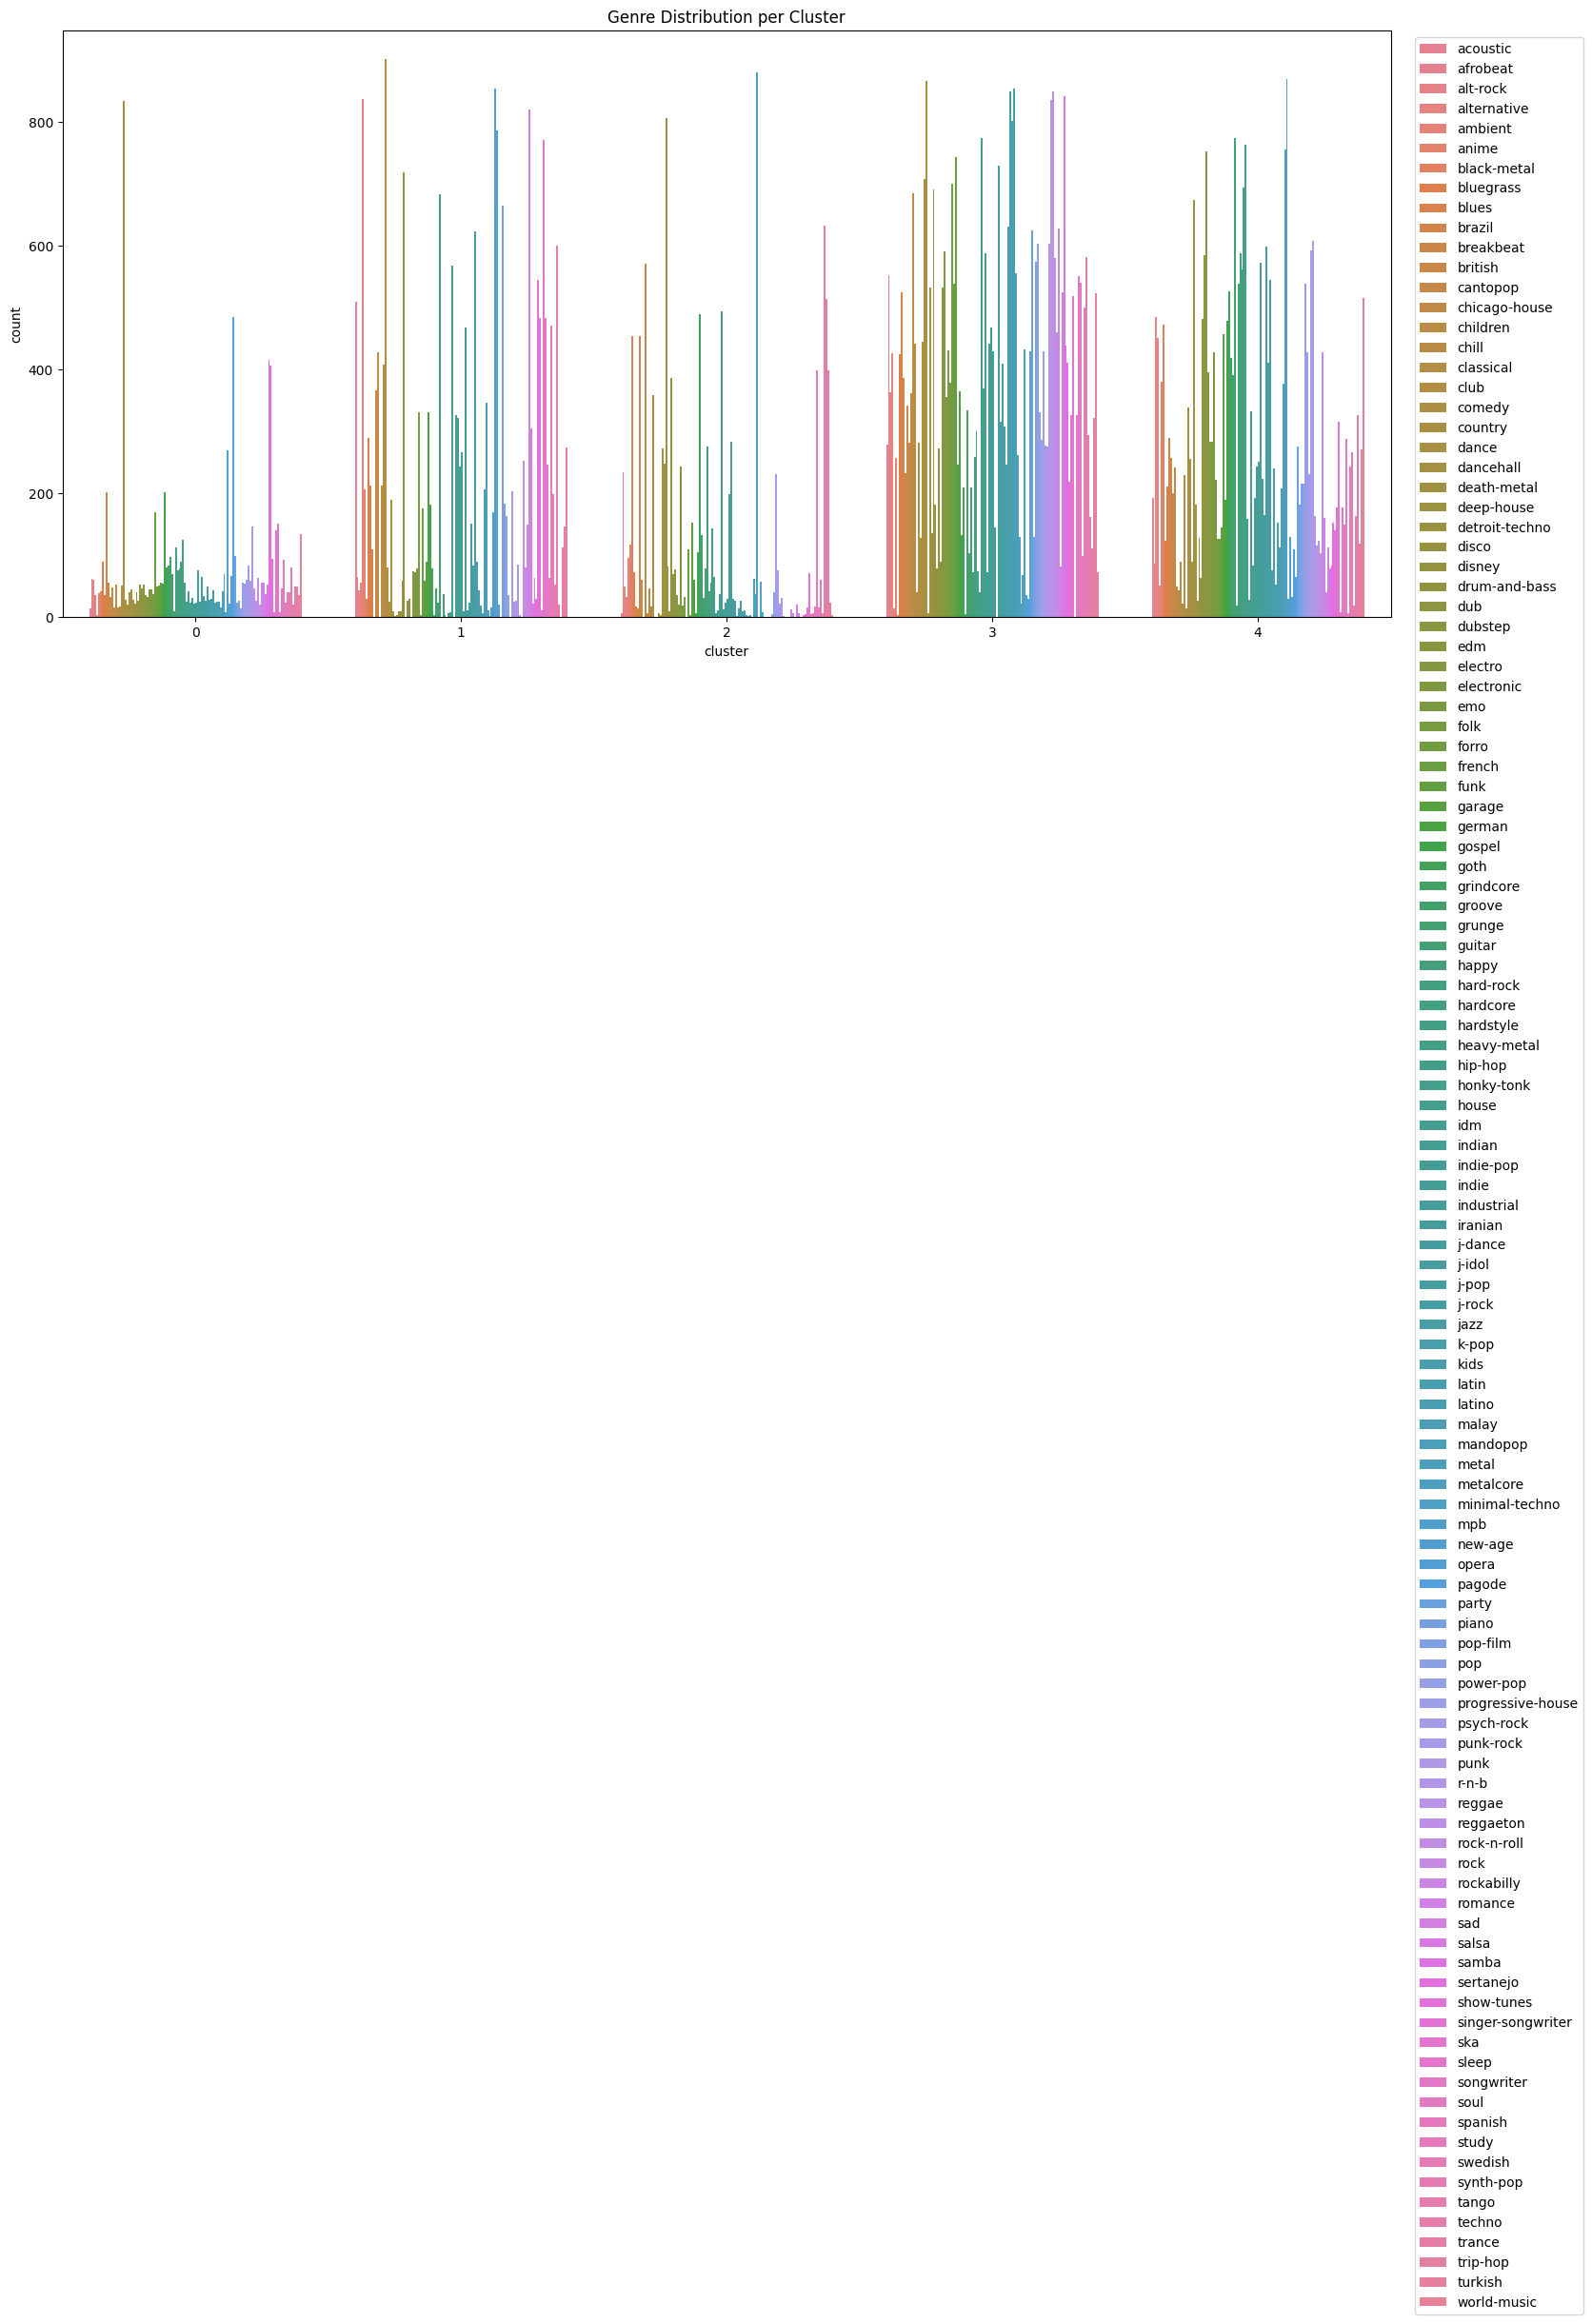

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Genre distribution per cluster
plt.figure(figsize=(18, 8))
sns.countplot(data=df, x='cluster', hue='track_genre', order=sorted(df['cluster'].unique()))
plt.title('Genre Distribution per Cluster')
plt.xticks(rotation=0)
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.tight_layout()
plt.show()


## Hierarchical Genre Classification

In [ ]:
# Load the data
import pandas as pd
df= pd.read_pickle("/content/drive/MyDrive/Audio_Genre_ML/df_with_clusters.pkl")

In [ ]:
selected_features = [
    'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
    'key', 'loudness', 'mode', 'speechiness', 'acousticness',
    'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
    'cluster'
]

In [ ]:
super_genres = {
    'rock': ['rock', 'rock-n-roll', 'punk', 'punk-rock', 'grunge', 'psych-rock', 'hard-rock'],
    'pop': ['pop', 'indie-pop', 'synth-pop', 'pop-film', 'power-pop'],
    'electronic': ['electronic', 'edm', 'electro', 'techno', 'trance', 'dubstep', 'house', 'deep-house', 'minimal-techno'],
    'metal': ['metal', 'heavy-metal', 'death-metal', 'black-metal', 'metalcore', 'grindcore'],
    'hiphop': ['hip-hop', 'rap', 'r-n-b'],
    'japanese': ['j-pop', 'j-rock', 'j-dance', 'j-idol'],
    'latin': ['reggaeton', 'reggae', 'salsa', 'brazil', 'latino', 'samba', 'mpb', 'pagode'],
    'classical': ['classical', 'piano', 'opera', 'new-age'],
    'country': ['country', 'honky-tonk'],
    'folk': ['folk', 'acoustic', 'bluegrass'],
    'ambient': ['ambient', 'study', 'sleep', 'chill'],
    'world': ['indian', 'turkish', 'iranian', 'mandopop', 'cantopop', 'malay', 'world-music'],
    'children': ['children', 'disney', 'kids'],
    'other': ['gospel', 'funk', 'jazz', 'blues', 'soul', 'show-tunes', 'comedy']
}

In [ ]:
def map_super_genre(genre):
    for super_genre, sub_genres in super_genres.items():
        if genre in sub_genres:
            return super_genre
    return 'misc'

df['super_genre'] = df['track_genre'].apply(map_super_genre)
y = df['super_genre']


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# X: Scaled features
X = df[selected_features]
y = df['super_genre']

# Standardize
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression
lr = LogisticRegression(max_iter=1000).fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression:\n", classification_report(y_test, y_pred_lr))

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Logistic Regression:
               precision    recall  f1-score   support

     ambient       0.41      0.27      0.33      1200
    children       0.47      0.18      0.26       900
   classical       0.50      0.39      0.44      1200
     country       0.24      0.12      0.16       600
  electronic       0.50      0.16      0.24      2700
        folk       0.14      0.00      0.00       900
      hiphop       0.00      0.00      0.00       600
    japanese       0.00      0.00      0.00      1200
       latin       0.42      0.08      0.13      2400
       metal       0.53      0.50      0.51      1800
        misc       0.41      0.87      0.56     12900
       other       0.45      0.18      0.26      2100
         pop       0.00      0.00      0.00      1500
        rock       0.27      0.06      0.09      2100
       world       0.19      0.02      0.03      2100

    accuracy                           0.42     34200
   macro avg       0.30      0.19      0.20     34200
weig

## Random forest

In [ ]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest:\n", classification_report(y_test, y_pred_rf))

Random Forest:
               precision    recall  f1-score   support

     ambient       0.66      0.47      0.55      1200
    children       0.75      0.40      0.52       900
   classical       0.63      0.59      0.61      1200
     country       0.88      0.56      0.69       600
  electronic       0.60      0.45      0.52      2700
        folk       0.41      0.16      0.23       900
      hiphop       0.22      0.09      0.13       600
    japanese       0.53      0.29      0.37      1200
       latin       0.64      0.63      0.64      2400
       metal       0.66      0.58      0.62      1800
        misc       0.52      0.76      0.62     12900
       other       0.62      0.41      0.49      2100
         pop       0.44      0.25      0.32      1500
        rock       0.44      0.29      0.35      2100
       world       0.50      0.36      0.42      2100

    accuracy                           0.55     34200
   macro avg       0.57      0.42      0.47     34200
weighted a

In [ ]:
# SVM
svm = SVC().fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM:\n", classification_report(y_test, y_pred_svm))

SVM:
               precision    recall  f1-score   support

     ambient       0.75      0.38      0.50      1200
    children       0.71      0.20      0.31       900
   classical       0.56      0.53      0.54      1200
     country       0.62      0.21      0.31       600
  electronic       0.73      0.13      0.23      2700
        folk       0.59      0.01      0.03       900
      hiphop       1.00      0.01      0.01       600
    japanese       0.54      0.02      0.04      1200
       latin       0.60      0.33      0.42      2400
       metal       0.67      0.44      0.53      1800
        misc       0.43      0.91      0.58     12900
       other       0.74      0.21      0.33      2100
         pop       0.43      0.00      0.00      1500
        rock       0.87      0.02      0.04      2100
       world       0.46      0.16      0.24      2100

    accuracy                           0.47     34200
   macro avg       0.65      0.24      0.27     34200
weighted avg       0

## Tune the Best Model with Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None]
}

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=3, scoring='f1_macro')
grid.fit(X_train, y_train)
print("Best Params:", grid.best_params_)


Best Params: {'max_depth': None, 'n_estimators': 100}


In [ ]:
sub_models = {}
for sg in df['super_genre'].unique():
    df_sg = df[df['super_genre'] == sg]
    if df_sg['track_genre'].nunique() < 2:
        continue  # Skip if only one fine genre

    X_sg = scaler.transform(df_sg[selected_features])
    y_sg = df_sg['track_genre']

    X_train_sg, X_test_sg, y_train_sg, y_test_sg = train_test_split(
        X_sg, y_sg, test_size=0.2, random_state=42, stratify=y_sg
    )

    model = RandomForestClassifier(n_estimators=100)
    model.fit(X_train_sg, y_train_sg)
    y_pred_sg = model.predict(X_test_sg)

    print(f"\nSuper Genre: {sg}")
    print(classification_report(y_test_sg, y_pred_sg))

    sub_models[sg] = model



Super Genre: folk
              precision    recall  f1-score   support

    acoustic       0.73      0.70      0.71       200
   bluegrass       0.89      0.88      0.89       200
        folk       0.76      0.81      0.78       200

    accuracy                           0.80       600
   macro avg       0.80      0.80      0.79       600
weighted avg       0.80      0.80      0.79       600


Super Genre: misc
                   precision    recall  f1-score   support

         afrobeat       0.48      0.49      0.49       200
         alt-rock       0.13      0.14      0.13       200
      alternative       0.19      0.16      0.17       200
            anime       0.46      0.47      0.47       200
        breakbeat       0.54      0.54      0.54       200
          british       0.39      0.28      0.32       200
    chicago-house       0.59      0.55      0.57       200
             club       0.53      0.41      0.46       200
            dance       0.61      0.64      0.62 

## Save the Hierarchical Models for Reuse

In [ ]:
import os

save_path = '/content/drive/MyDrive/Audio_Genre_ML'
os.makedirs(save_path, exist_ok=True)



In [ ]:
import joblib

# Save super genre classifier
joblib.dump(rf, os.path.join(save_path, 'super_genre_model.pkl'))

# Save sub-models
for sg, model in sub_models.items():
    file_path = os.path.join(save_path, f'fine_genre_model_{sg}.pkl')
    joblib.dump(model, file_path)


In [ ]:
joblib.dump(scaler, os.path.join(save_path, 'hierarchical_scaler.pkl'))


['/content/drive/MyDrive/Audio_Genre_ML/hierarchical_scaler.pkl']

## Load

In [ ]:
# Load super genre model
rf = joblib.load('/content/drive/MyDrive/Audio_Genre_ML/super_genre_model.pkl')

# Load fine genre models
import glob

sub_models = {}
model_files = glob.glob('/content/drive/MyDrive/Audio_Genre_ML/fine_genre_model_*.pkl')
for file in model_files:
    sg = os.path.basename(file).replace('fine_genre_model_', '').replace('.pkl', '')
    sub_models[sg] = joblib.load(file)


##  Final Genre Classification Pipeline (Combined)

### Step-by-step Explanation:

Standardize the input features

Predict Super Genre using a trained model

Use correct sub-model to predict Fine Genre (if available)

Return both predictions

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import joblib

# 1. Predefined global variables (models + features)
selected_features = [
    'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
    'key', 'loudness', 'mode', 'speechiness', 'acousticness',
    'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
    'cluster'
]

# Fit scaler on full dataset
scaler = StandardScaler()
scaler.fit(df[selected_features])


super_genre_model = joblib.load('/content/drive/MyDrive/Audio_Genre_ML/super_genre_model.pkl')


# Load fine genre models
import glob

sub_models = {}
model_files = glob.glob('/content/drive/MyDrive/Audio_Genre_ML/fine_genre_model_*.pkl')
for file in model_files:
    sg = os.path.basename(file).replace('fine_genre_model_', '').replace('.pkl', '')
    sub_models[sg] = joblib.load(file)


# 2. Pipeline function
def classify_genre(df_input):
    """
    Takes a DataFrame and returns super_genre and fine_genre predictions.
    """

    # Step 1: Feature Scaling
    X = df_input[selected_features]
    X_scaled = scaler.transform(X)

    # Step 2: Predict Super Genre
    super_preds = super_genre_model.predict(X_scaled)

    fine_preds = []

    # Step 3: For each sample, pick sub-model based on super genre
    for i, sg in enumerate(super_preds):
        if sg in sub_models:
            try:
                model = sub_models[sg]
                pred = model.predict(X_scaled[i].reshape(1, -1))[0]
            except:
                pred = 'unknown'
        else:
            pred = 'unknown'
        fine_preds.append(pred)

    return pd.DataFrame({
        'super_genre_pred': super_preds,
        'fine_genre_pred': fine_preds
    })


In [ ]:
# Example: Predict genres for 5 new songs
df_sample = df.sample(5)  # or your new input data
predictions = classify_genre(df_sample)
print(predictions)


  super_genre_pred fine_genre_pred
0       electronic  minimal-techno
1            world     world-music
2             folk        acoustic
3             rock       hard-rock
4       electronic          trance


## Hierarchical Genre Classification
###Objective
To classify music tracks into a two-level genre hierarchy:

Super Genre – Broad genre categories like rock, electronic, hip-hop.

Sub Genre – Finer-grained styles within each super genre (e.g., punk, grunge under rock).

This hierarchical approach improves interpretability and mirrors how genres are typically structured in the music industry.

###Model Architecture

Super Genre Classifier: Random Forest

Sub Genre Classifiers: Separate Random Forest models per super genre (one-vs-rest design)

###Level 1: Super Genre Classification
Model: Random Forest
Accuracy: 55%
Macro F1 Score: 0.47
Weighted F1 Score: 0.53

Key Highlights:

Strong performance on country, metal, latin, and classical genres.

Challenges with hip-hop, folk, and pop, likely due to genre overlap and imbalanced distribution.

Miscellaneous category had high recall due to absorbing ambiguous tracks.

###Level 2: Sub Genre Classification
Each super genre’s tracks were passed into its own sub-genre classifier.

Top Performers (Accuracy ≥ 90%)

Super Genre	Accuracy	Sub Genres
Country	99%	country, honky-tonk
Hip-Hop	95%	hip-hop, r-n-b
Ambient	92%	ambient, chill, sleep, study

Strong Performers (70–89%)

Super Genre	Accuracy	Sub Genres
Children	87%	children, disney, kids
Folk	80%	acoustic, bluegrass, folk
Classical	80%	classical, new-age, opera, piano
Other	72%	blues, comedy, funk, gospel, jazz, show-tunes, soul
Pop	71%	indie-pop, pop, pop-film, power-pop, synth-pop
Japanese	70%	j-dance, j-idol, j-pop, j-rock

Moderate Performers (50–69%)

Super Genre	Accuracy	Sub Genres
World	69%	cantopop, indian, iranian, malay, mandopop, turkish, world-music
Metal	65%	black-metal, death-metal, grindcore, heavy-metal, metal, metalcore
Rock	52%	grunge, hard-rock, psych-rock, punk, punk-rock, rock, rock-n-roll

Challenging Categories (< 50%)

Super Genre	Accuracy	Sub Genres
Misc	48%	43 sub-genres – largest and most diverse category
Latin	45%	brazil, latino, mpb, pagode, reggae, reggaeton, salsa, samba
Electronic	44%	deep-house, dubstep, edm, electro, electronic, house, minimal-techno, techno, trance

## Summary
The hierarchical structure significantly improves clarity by separating coarse and fine classifications.

Genres with fewer and more distinct sub-genres (e.g., Country, Hip-Hop) show superior accuracy.

Lower-performing groups often suffer from high intra-genre diversity, genre blending, or noisy labeling (Misc, Electronic, Latin).

##  Visualization of Genre Predictions

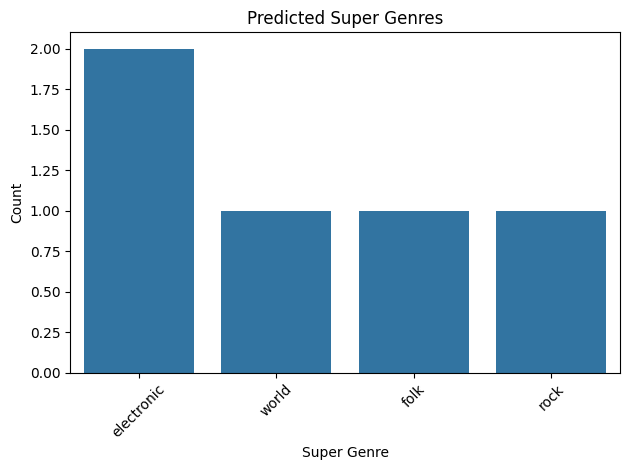

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot of predicted super genres
sns.countplot(x='super_genre_pred', data=predictions, order=predictions['super_genre_pred'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Predicted Super Genres')
plt.xlabel('Super Genre')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


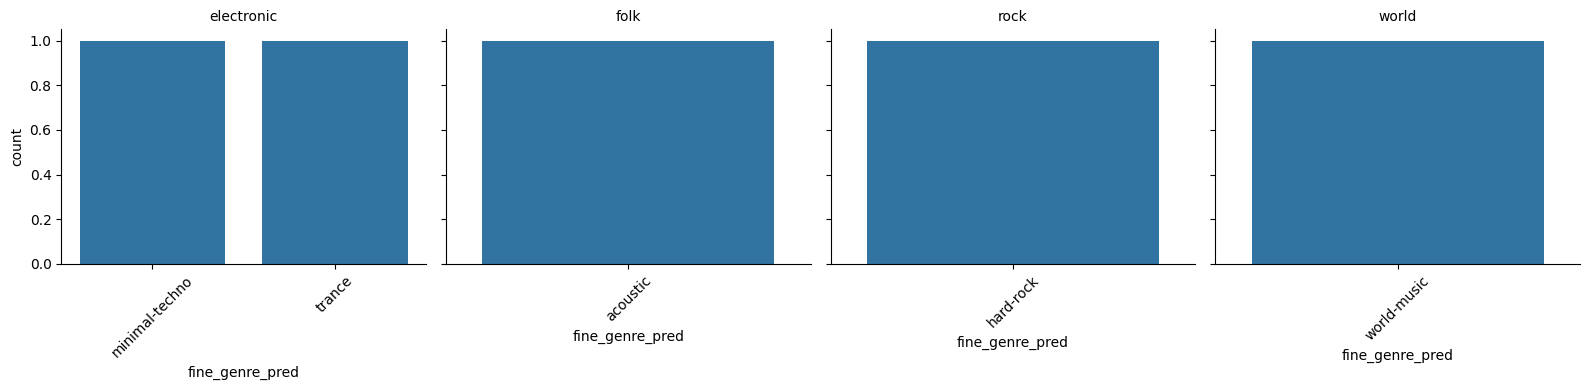

In [ ]:
# Group by super and fine genre
genre_counts = predictions.groupby(['super_genre_pred', 'fine_genre_pred']).size().reset_index(name='count')

# Plot using FacetGrid
g = sns.FacetGrid(genre_counts, col='super_genre_pred', col_wrap=4, height=4, sharex=False)
g.map_dataframe(sns.barplot, x='fine_genre_pred', y='count')
g.set_titles(col_template="{col_name}")
for ax in g.axes.flatten():
    ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()


## Insights

“Our hierarchical genre classification system first predicts the super genre using a global Random Forest classifier trained on 15 audio features + cluster assignment. Then, for each predicted super genre, a dedicated sub-classifier is used to predict the fine-grained genre.

The system performs well in categories like comedy (98% precision) and country (100%), while struggles are observed in ambiguous genres like alternative (18%) and singer-songwriter (6%) due to overlap in acoustic features.

Overall, this hierarchical approach improves clarity and accuracy by narrowing the decision boundary within each genre group.”

## Feature Importance (Super Genre Model)

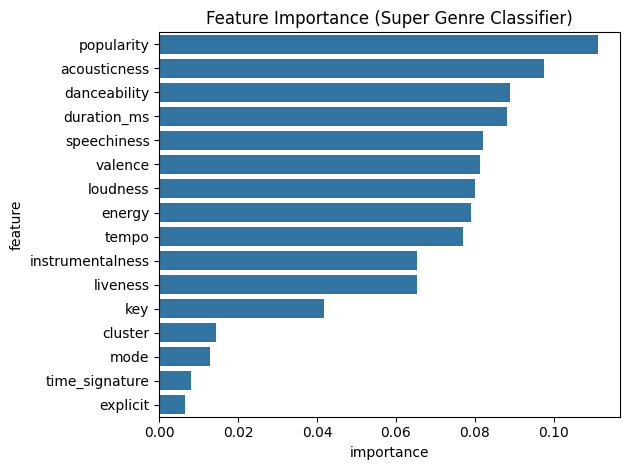

In [ ]:
import pandas as pd

# Get importance
importances = super_genre_model.feature_importances_
features_df = pd.DataFrame({'feature': selected_features, 'importance': importances})
features_df = features_df.sort_values(by='importance', ascending=False)

# Plot
sns.barplot(x='importance', y='feature', data=features_df)
plt.title('Feature Importance (Super Genre Classifier)')
plt.tight_layout()
plt.show()


## Key Insights:


This suggests that super genre classification relies heavily on commercial and perceptual qualities (popularity, how acoustic/electronic it sounds, how danceable it is) rather than technical musical elements like key or time signature. The high importance of popularity is particularly interesting - it implies that commercial success patterns are strongly genre-specific, possibly reflecting different audience preferences and industry dynamics across genres.

## SHAP on Super Genre Classifier

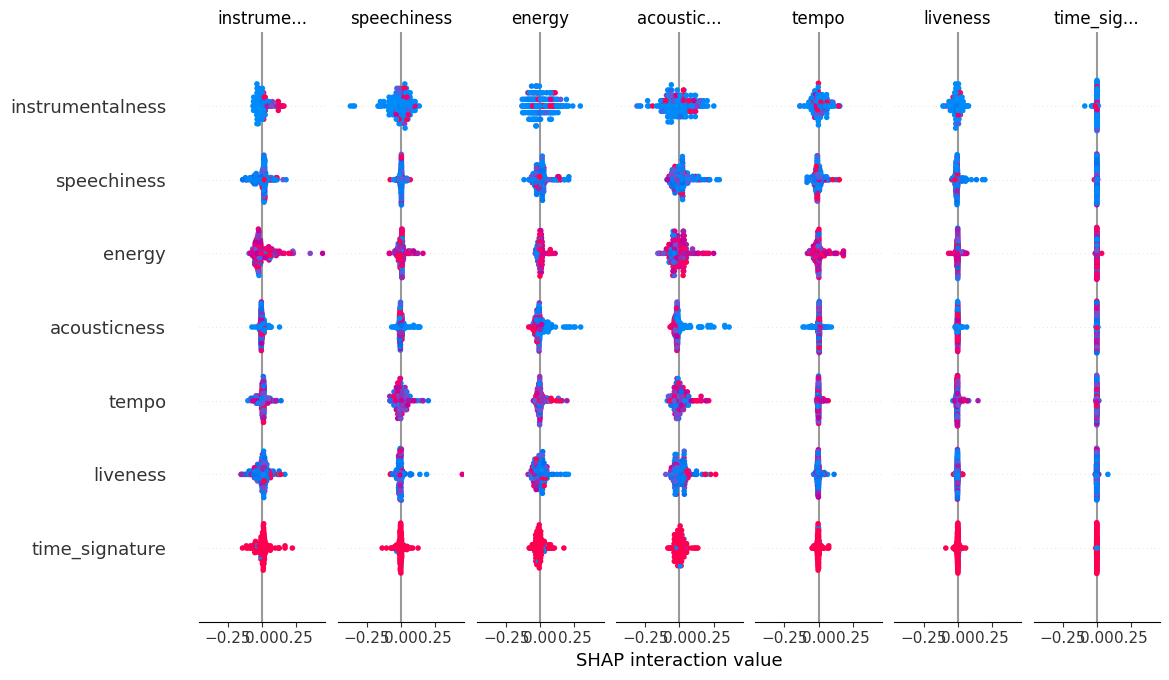

In [ ]:
import shap

# Create explainer
explainer = shap.TreeExplainer(super_genre_model)

# Choose a subset for explanation
X_sample = scaler.transform(df[selected_features].sample(200, random_state=42))

# Get SHAP values
shap_values = explainer.shap_values(X_sample)

# Plot
shap.summary_plot(shap_values, X_sample, feature_names=selected_features)


## Key observations:


Strong Interactions:

Instrumentalness vs Energy: Shows notable interaction patterns - likely instrumental tracks have different energy profiles than vocal tracks
Acousticness vs Energy: Clear interaction - acoustic songs typically have lower energy, so these features work together predictively
Energy vs Acousticness: The inverse relationship is confirmed in the symmetric cell

Moderate Interactions:

Tempo interactions: Tempo shows some interaction with most other features, suggesting it modifies how other characteristics are interpreted
Speechiness interactions: Particularly with instrumentalness and acousticness, which makes sense as these are somewhat opposing characteristics

Weaker Interactions:

Time signature: Shows relatively weak interactions across the board, confirming it's less important for genre classification
Liveness: Generally shows smaller interaction effects

## Interpretation:


The model learns that certain feature combinations are particularly informative for genre prediction. For example, a song that's both highly acoustic AND low energy might be more definitively classified as folk/acoustic, while the combination of high instrumentalness AND high energy might strongly suggest electronic/dance genres. These interactions help the model make more nuanced predictions than using features independently.